# Dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../')
from src.dataset.video import Video
from src.dataset.dataset import Dataset

In [3]:
sns.set_context('paper', font_scale=1.6, 
                rc={'lines.linewidth': 2,
                    'text.usetex' : True,
                    'image.interpolation': 'nearest',
                    'image.cmap': 'gray',
                    'figure.figsize': (10.0, 8.0)})
sns.set_style(style='white')
sns.set_palette('colorblind', color_codes=True)

In [4]:
videos_paths = glob.glob("../data/database_convertida/*.avi")

In [5]:
def get_dataset(paths):
    words = dict()
    words['filenames'] = []
    words['words'] = []
    words['backgrounds'] = []
    words['ids'] = []
    words['duration'] = []
    words['frames'] = []
        
    for path in paths:
        vid = Video(path)
        
        
        filename = os.path.basename(path)
        s = filename.split('_')
                
        words['filenames'].append(filename)
        words['words'].append(s[0])
        words['backgrounds'].append(s[1])
        words['ids'].append(s[2].split('.')[0])
        words['frames'].append(vid.get_nb_frames())
        words['duration'].append(vid.get_duration())
            
    return pd.DataFrame(words)    


In [6]:
dataset = get_dataset(videos_paths)
dataset

,filenames,words,backgrounds,ids,duration,frames
0,VELZ_F3_ID35.avi,VELZ,F3,ID35,2.416667,58
1,VELZ_F3_ID21.avi,VELZ,F3,ID21,1.908461,57
2,VELZ_F2_ID35.avi,VELZ,F2,ID35,2.166667,52
3,VELZ_F3_ID34.avi,VELZ,F3,ID34,1.791667,43
4,VELZ_F3_ID32.avi,VELZ,F3,ID32,1.916667,46
...,...,...,...,...,...,...
542,ADME_F1_ID23.avi,ADME,F1,ID23,2.800000,42
543,IMPO_F3_ID30.avi,IMPO,F3,ID30,2.853919,86
544,ADME_F1_ID04.avi,ADME,F1,ID04,2.133333,32
545,IMPO_F2_ID40.avi,IMPO,F2,ID40,2.708333,65


In [7]:
dataset.describe()

,duration,frames
count,547.000000,547.000000
mean,2.336879,50.047532
std,0.735844,22.177884
min,0.933333,14.000000
25%,1.800000,33.000000
50%,2.208333,47.000000
75%,2.750000,64.000000
max,5.375000,134.000000


In [8]:
nb_videos = len(dataset)
nb_unq_words = len(dataset['words'].unique())
nb_unq_bkg = len(dataset['backgrounds'].unique())
nb_unq_ids = len(dataset['ids'].unique())


print(f"We have:\n\
{nb_videos} videos\n\
{nb_unq_words} words\n\
{nb_unq_bkg} backgrounds\n\
{nb_unq_ids} ids\n\
")

We have:
547 videos
24 words
3 backgrounds
20 ids



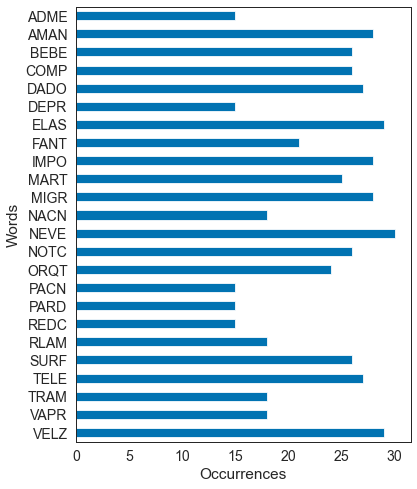

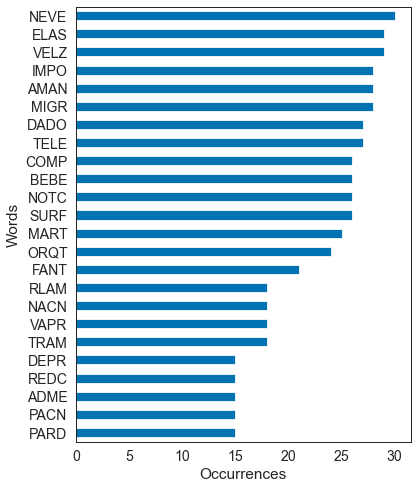

In [9]:
plt.figure(figsize=(6,8))

# plt.subplot(1,2,1)
dataset['words'].value_counts().sort_index()[::-1].plot(kind='barh')
# plt.title('sorted by index')
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.savefig('../figs/words_occur_byindex.png', bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure(figsize=(6,8))

# plt.subplot(1,2,2)
# plt.title('sorted by occurrences')
dataset['words'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.savefig('../figs/words_occur_byoccur.png', bbox_inches='tight', pad_inches=0)
plt.show()

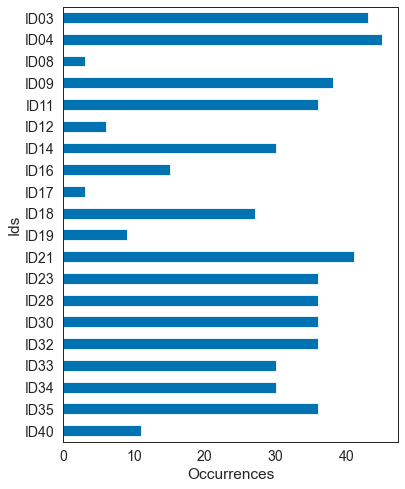

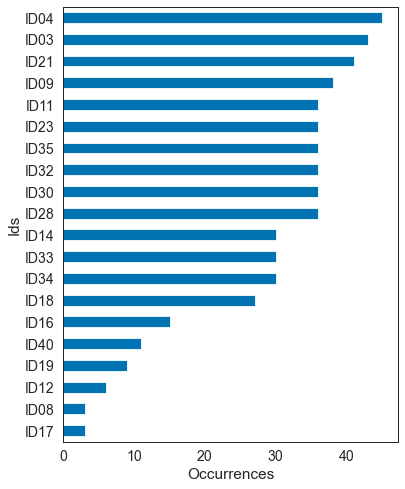

In [10]:
plt.figure(figsize=(6,8))

# plt.subplot(1,2,1)
# plt.title('sorted by occurrences')
dataset['ids'].value_counts().sort_index()[::-1].plot(kind='barh')
plt.xlabel('Occurrences')
plt.ylabel('Ids')
plt.savefig('../figs/ids_occur_byindex.png', bbox_inches='tight', pad_inches=0)
plt.show()


# plt.subplot(1,2,1)
# plt.title('sorted by occurrences')
plt.figure(figsize=(6,8))
dataset['ids'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('Occurrences')
plt.ylabel('Ids')
plt.savefig('../figs/ids_occur_byoccur.png', bbox_inches='tight', pad_inches=0)
plt.show()

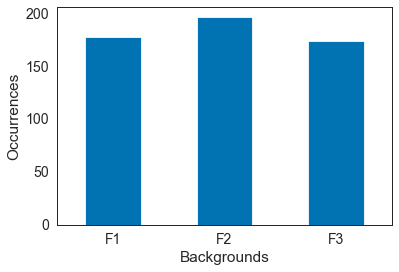

In [11]:
# plt.subplot(1,2,2)
# plt.figure(figsize=(15,8))
# plt.title('sorted by index')
dataset['backgrounds'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Occurrences')
plt.xlabel('Backgrounds')
plt.xticks(rotation=0)
plt.savefig('../figs/bkgs_occur.png', bbox_inches='tight', pad_inches=0)
plt.show()
plt.show()

## Occurrences

In [12]:
def group_df(df, group):    
    df_grouped = df.groupby(group)['filenames'].count()
    df_grouped = (df_grouped.reset_index()
                  .pivot(index=group[0], columns=group[1])).fillna(0.)
    return df_grouped

In [13]:
df_words_ids = group_df(dataset, ['words','ids'])
df_ids_bkgs = group_df(dataset, ['ids','backgrounds'])

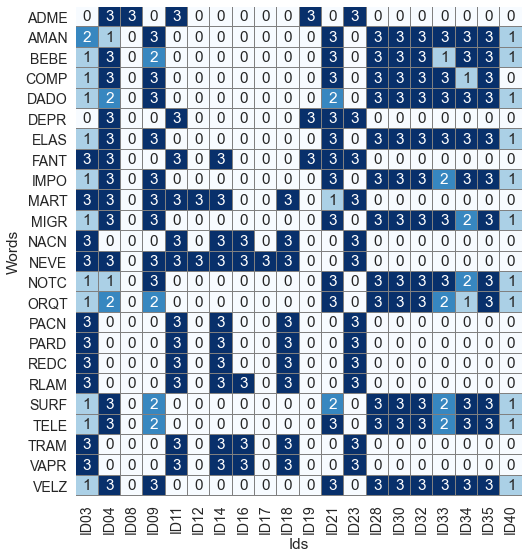

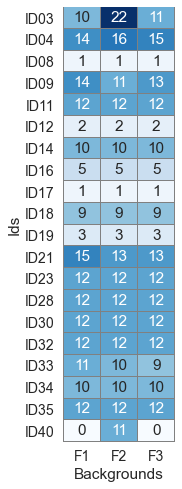

In [14]:
plt.figure(figsize=(8,9))
# plt.subplot(1,2,1)
heatmap = sns.heatmap(df_words_ids, cmap='Blues', annot=True, cbar=False, linewidths=0.01, linecolor='gray')
heatmap.set_xticklabels([id for _,id in df_words_ids.columns], rotation=90)
plt.xlabel('Ids')
plt.ylabel('Words')
plt.savefig('../figs/heatmap_ids_words.png', bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure(figsize=(2,8))
# plt.subplot(1,2,2)
heatmap = sns.heatmap(df_ids_bkgs, cmap='Blues', annot=True, cbar=False, linewidths=0.01, linecolor='gray')
heatmap.set_xticklabels([f for _,f in df_ids_bkgs.columns], rotation=0) 
plt.xlabel('Backgrounds')
plt.ylabel('Ids')
plt.savefig('../figs/heatmap_bkgs_ids.png', bbox_inches='tight', pad_inches=0)


plt.show()

When plotting this, we perceived 4 occurrences for NACN id 16. When looking in the videos, we noticed, a video named `NACN_F1_ID16__REJEIT.avi`. We deleted this video.
Now, we have 3 max occurrences per word.

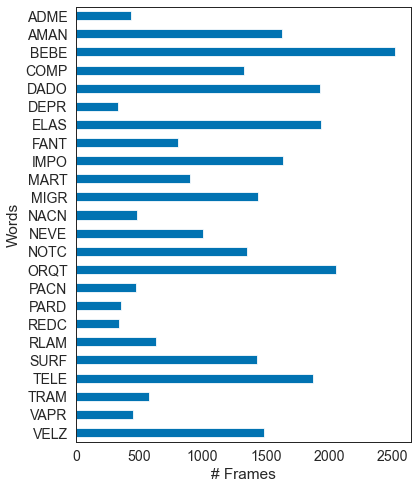

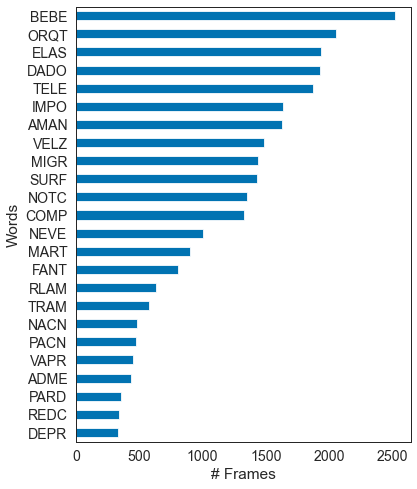

In [15]:
plt.figure(figsize=(6,8))

# plt.subplot(1,2,1)
dataset.groupby('words')['frames'].sum().sort_index()[::-1].plot(kind='barh')

# plt.title('sorted by index')
plt.xlabel('# Frames')
plt.ylabel('Words')
plt.savefig('../figs/frames_words_byindex.png', bbox_inches='tight', pad_inches=0)
plt.show()

# plt.subplot(1,2,2)
plt.figure(figsize=(6,8))
# plt.title('sorted by occurrences')
dataset.groupby('words')['frames'].sum().sort_values().plot(kind='barh')

plt.xlabel('# Frames')
plt.ylabel('Words')
plt.savefig('../figs/frames_words_byoccur.png', bbox_inches='tight', pad_inches=0)
plt.show()

# Videos

In [16]:
video = Video(videos_paths[7])
video.info()

filepath: ../data/database_convertida/VELZ_F3_ID28.avi
Total frames: 41
Total seconds: 1.708333
fps: 24.0
width, height: 640 480


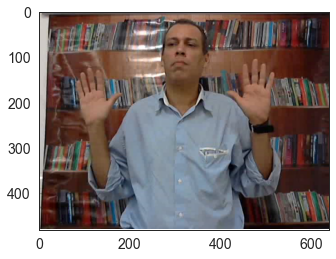

In [17]:
frame = video.get_frame(7)
plt.imshow(frame[:,:,::-1])
plt.show()

In [18]:
data = Dataset('../data/database_convertida')
data.info()

Number of videos: 547
Total frames: 27376
Total seconds: 1278.272934000001


In [19]:
durations = []
for videopath in videos_paths:
    video = Video(videopath)
    durations.append(video.get_duration())
durations = np.asarray(durations)  

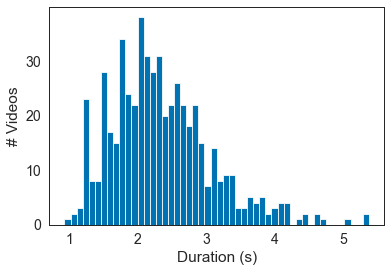

mean: 2.34, median: 2.21, std: 0.74


In [20]:
# plt.figure(figsize=(6,5))
plt.hist(durations, bins=50)
plt.ylabel('# Videos')
plt.xlabel('Duration (s)')
plt.savefig('../figs/videos_duration_dist.png', bbox_inches='tight', pad_inches=0)
plt.show()        
print(f'mean: {durations.mean():.2f}, median: {np.median(durations):.2f}, std: {durations.std():.2f}')